<a href="https://colab.research.google.com/github/ESKINDERTSEGAYE/Programming/blob/main/ML_TP1_20215511_Eskinder_Tsegaye_Defar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Eskinder Tsegaye Defar

ID: 20215511

Machine Learning TP-I

<p>1. Generate 2000 data points with one dimensional feature randomly sampled. For each data point attribute a real number representing its target value.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

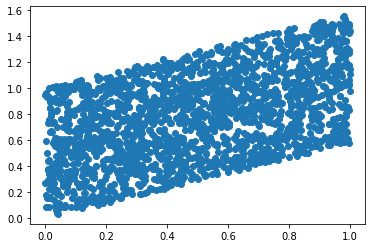

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 2000
X = np.random.rand(n_samples,1)
y = np.random.rand(1)*X + np.random.rand(n_samples,1)
plt.scatter(X,y)

<p>2. Fit a line using the data points and their target values using two different methods


Method-I Using gradient descent Method


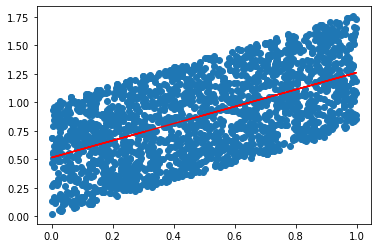

In [7]:
import numpy as np
import matplotlib.pyplot as plt
no_samples=2000
x=np.random.rand(no_samples,1)

y=np.random.rand(1)*x+np.random.rand(no_samples,1)
X=np.concatenate((np.ones((no_samples,1)),x),axis=1)
#visualiation
plt.scatter(x,y)


theta =np.random.rand(1,2)
alpha =np.random.rand(1)

for i in range(1000):  
 for j in range(no_samples):
   grad = -(2/no_samples)*(y[j]-np.dot(theta,X[j].T))*X[j]
   theta = theta - alpha * grad

y_hat = np.dot(theta,X.T)
plt.plot(x,y_hat.T,color="red")

Method II

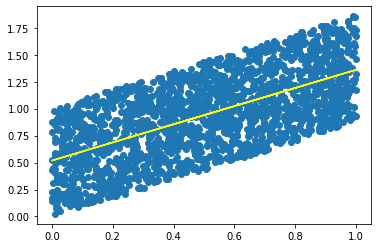

In [13]:
import numpy as np
import matplotlib.pyplot as plt
no_samples=2000
x=np.random.rand(no_samples,1)

y=np.random.rand(1)*x+np.random.rand(no_samples,1)
X=np.concatenate((np.ones((no_samples,1)),x),axis=1)
#visualiation
plt.scatter(x,y)


theta =np.random.rand(1,2)
alpha =np.random.rand(1)

for i in range(1200):
  grad = (-2/no_samples)*np.dot((y.T-np.dot(theta,X.T)),X)
   
  theta = theta - alpha * grad

y_hat = np.dot(theta,X.T)
plt.plot(x,y_hat.T,color="yellow")

<p>3. Add 20 outlier data points randomly distributed, set them and their target values far away from the original data point</p>\n"

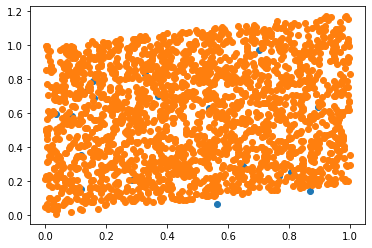

In [14]:
import numpy as np
import matplotlib.pyplot as plt
n_outliers = 20
x = np.random.rand(n_outliers,1)
y = np.random.rand(n_outliers)

no_samples=2000
X=np.random.rand(no_samples,1)

Y=np.random.rand(1)*X+np.random.rand(no_samples,1)

#visualiation
plt.scatter(x,y)
plt.scatter(X,Y)

<p>4. Fit a line using all data points using one of the proposed two methods. What do you observe?

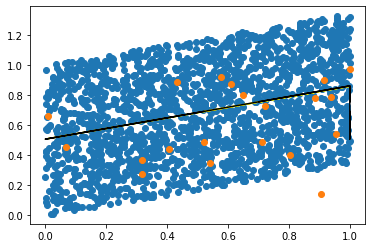

In [18]:
import numpy as np
imutliers = 20
xn = np.random.rand(n_outliers,1)
yn = np.random.rand(n_outliers,1)

no_samples=2000
xo=np.random.rand(no_samples,1)
yo=np.random.rand(1)*xo+np.random.rand(no_samples,1)

xt=np.concatenate((xo,xn))
yt=np.concatenate((yo,yn))

Xo=np.concatenate((np.ones((no_samples,1)),xo),axis=1)
Xn=np.concatenate((np.ones((no_samples+n_outliers,1)),xt),axis=1)
#visualiation
plt.scatter(xo,yo)
plt.scatter(xn,yn)

theta_n =np.random.rand(1,2)
theta_o =np.random.rand(1,2)
alpha =np.random.rand(1)

for i in range(1200):
  gradn =(-2/(no_samples+n_outliers))*np.dot((yt.T-np.dot(theta_n,Xn.T)),Xn)
  grado =(-2/no_samples)*np.dot((yo.T-np.dot(theta_o,Xo.T)),Xo)
   
  theta_n = theta_n - alpha * gradn
  theta_o = theta_o - alpha * grado

y_hat_n = np.dot(theta_n,Xn.T)
y_hat_o = np.dot(theta_o,Xo.T) 


plt.plot(xt,y_hat_n.T,color="yellow")
plt.plot(Xo,y_hat_o.T,"black")


Comment:The outliers have not affected the boundary line significantly and shifted its orginal position slightly.The black line has almost overlapped the yellow line.

<p>5. Add a regularisation to the proposed method, use the sum of the square of coefficients. What do you observe?

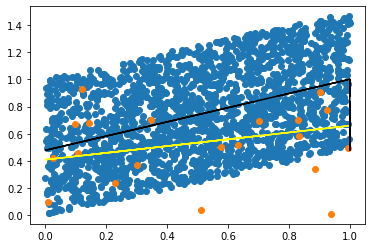

In [19]:
import numpy as np
import matplotlib.pyplot as plt
n_outliers = 20
xn = np.random.rand(n_outliers,1)
yn = np.random.rand(n_outliers,1)

no_samples=2000
xo=np.random.rand(no_samples,1)
yo=np.random.rand(1)*xo+np.random.rand(no_samples,1)

xt=np.concatenate((xo,xn))
yt=np.concatenate((yo,yn))

Xo=np.concatenate((np.ones((no_samples,1)),xo),axis=1)
Xn=np.concatenate((np.ones((no_samples+n_outliers,1)),xt),axis=1)
#visualiation
plt.scatter(xo,yo)
plt.scatter(xn,yn)

theta_n =np.random.rand(1,2)
theta_o =np.random.rand(1,2)
alpha =np.random.rand(1)
alpha_r=0.5

for i in range(1200):
  gradn =(-2/(no_samples+n_outliers))*np.dot((yt.T-np.dot(theta_n,Xn.T)),Xn)+alpha_r*2*theta_n
  grado =(-2/no_samples)*np.dot((yo.T-np.dot(theta_o,Xo.T)),Xo)
   
  theta_n = theta_n - alpha * gradn
  theta_o = theta_o - alpha * grado

y_hat_n = np.dot(theta_n,Xn.T)
y_hat_o = np.dot(theta_o,Xo.T) 


plt.plot(xt,y_hat_n.T,color="yellow")
plt.plot(Xo,y_hat_o.T,"black")


Comment: Regularization is used to reduce the complexity. However the boundary line has shifted significantly

<p>6. Fit linear model with RANSAC algorithm

In [48]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the Boston Housing dataset

In [49]:
Boston_dataset = datasets.load_boston()
df = pd.DataFrame(Boston_dataset.data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = Boston_dataset.target
#
# Select Avg. No of rooms per dwelling as feature
# and fit the model
#
X = df['RM'].to_numpy().reshape(-1, 1)
y = df['MEDV'].to_numpy().reshape(-1, 1)
#
# Create an instance of RANSACRegressor
#
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=50, max_trials=100,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=10)
#
# Fit the model
#
ransac.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=42, residual_threshold=10)

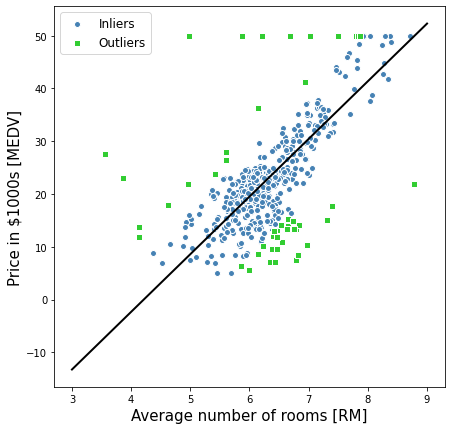

In [53]:
# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
#
# Create scatter plot for inlier datset
plt.figure(figsize=(7, 7))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')

#Create scatter plot for outlier datset

plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
#
# Draw the best fit line
#
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]', fontsize=15)
plt.ylabel('Price in $1000s [MEDV]', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()

<p>1. Create an instance of Logistic Regression Classifier and fit the data.

 Iris dataset

Importing required Libraries

In [66]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets
import seaborn as sns

%matplotlib inline

Loading Data

In [67]:
d = sns.load_dataset("iris")
#d = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])



In [70]:
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Extracting the data information

In [71]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [72]:
d.size

750

In [73]:
iris = load_iris()

print(iris.data)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [88]:
d = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [74]:
d.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [89]:
d['target'].unique()

array([0., 1., 2.])

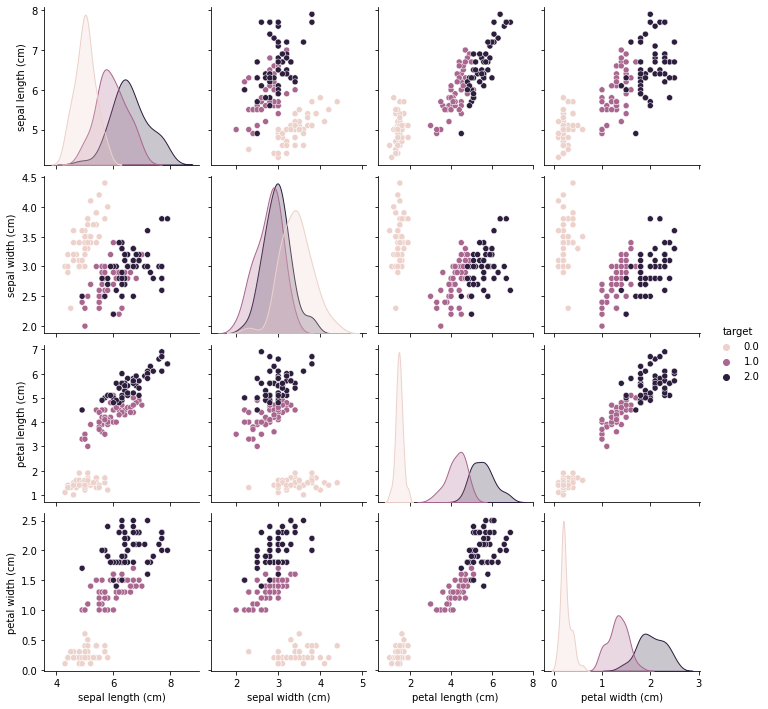

In [90]:
import seaborn as sns
sns.pairplot(d,hue = 'target')

Feature and Lable set

In [92]:
X = d.drop(['target'], axis = 1)
Y = d['target']

Train Test Split

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


Applying Logistic regression model

In [94]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy of the model

In [95]:
m.score(x_test, y_test)

0.9666666666666667

In [96]:
from sklearn import metrics
print("Model Accuracy :", metrics.accuracy_score(y_test, m.predict(x_test)))

Model Accuracy : 0.9666666666666667


Visualization with Confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, m.predict(x_test))
CM

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]])

Text(69.0, 0.5, 'Truth')

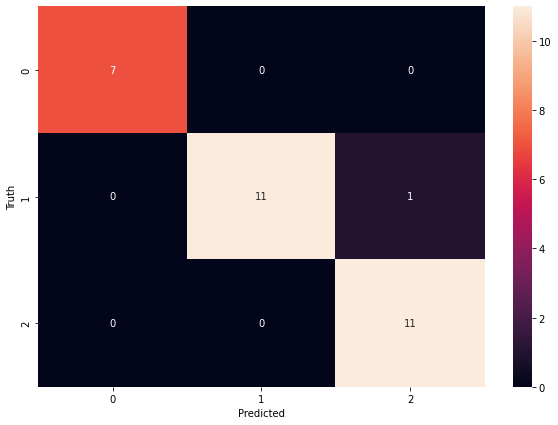

In [99]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")